<a href="https://colab.research.google.com/github/thanit456/NeuroSummary/blob/master/Project_NLP_LSTM_encoder_decoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prep

### Cleaning
- remove special case

In [0]:
import re
def basic_cleaner(text) :
  special_char = '!|"|#|%|&|\'|,|-|/|:|;|<|=|>|@|_|`|~|\.|\$'.split("|")# type(result)
  nstr = text
  for special in special_char :
    nstr = re.sub(special+"+",special.replace('\\',''),nstr)
  nstr = re.sub("|^||'","",nstr).replace("|","").replace("*","").replace("  "," ").replace(u'\xa0', u' ')
  return nstr

In [0]:
df_content = thaigov_dataset.loc[:,'content'] 

NameError: ignored

In [0]:
df_content_clean = df_content.apply(basic_cleaner)
df_content_diff = df_content_clean[df_content != df_content_clean]

## Split Dataset\

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import re

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import copy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
old_df = pd.read_pickle('/content/drive/Shared drives/NeuroSummary/data/all_deepcut_thaigov_1_24.pkl')
df = pd.DataFrame({'content': old_df['tokenized_deepcut_content'], 'headline': old_df['tokenized_deepcut_headline'], 'class': old_df['class_name']})

In [0]:
len(df)

17367

In [0]:
print(old_df.columns)

In [0]:
df_stop = pd.DataFrame({'content': old_df['removed_stopwords_content'], 'headline': old_df['removed_stopwords_headline'], 'class': old_df['class_name']})

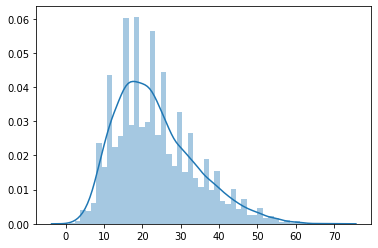

In [0]:
headline_dist = list(map(lambda x: len(x),list(df.headline)))
sns.distplot(headline_dist);

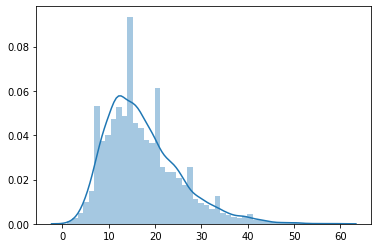

In [0]:
headline_dist = list(map(lambda x: len(x),list(df_stop.headline)))
sns.distplot(headline_dist);

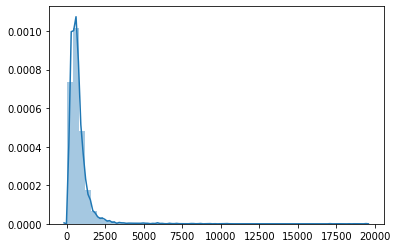

In [0]:
content_dist = list(map(lambda x: len(x),list(df.content)))
sns.distplot(content_dist);

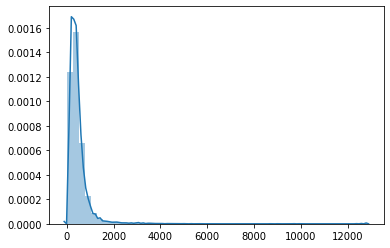

In [0]:
content_dist = list(map(lambda x: len(x),list(df_stop.content)))
sns.distplot(content_dist);

In [0]:
def remove_space_special(content_arr) :
  return list(filter(lambda x: x not in " (){}!,'`<>=@_:;,\'\"\\”“‘’",np.array(content_arr)))
# def replace_ห
df.headline = df.headline.apply(remove_space_special)
df.content = df.content.apply(remove_space_special)
df_stop.headline = df_stop.headline.apply(remove_space_special)
df_stop.content = df_stop.content.apply(remove_space_special)

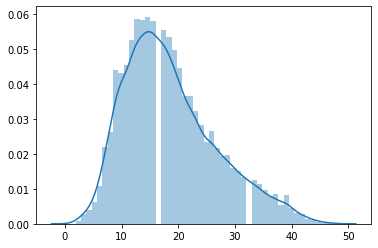

In [0]:
headline_dist = list(map(lambda x: len(x),list(df.headline)))
sns.distplot(headline_dist);

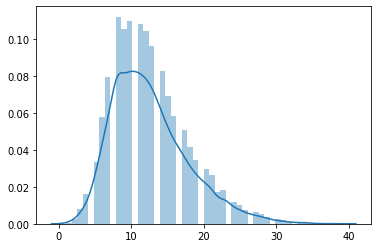

In [0]:
headline_dist = list(map(lambda x: len(x),list(df_stop.headline)))
sns.distplot(headline_dist);

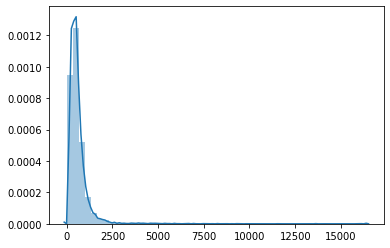

In [0]:
content_dist = list(map(lambda x: len(x),list(df.content)))
sns.distplot(content_dist);

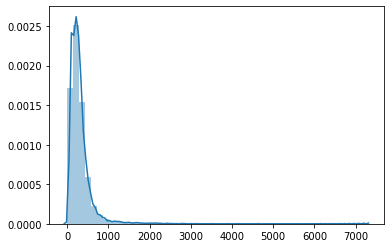

In [0]:
content_dist = list(map(lambda x: len(x),list(df_stop.content)))
sns.distplot(content_dist);

In [0]:
max_len_headline = max(df.headline.apply(lambda x: len(x)))
print("max len headline : ",max_len_headline)
max_len_content = max(df.content.apply(lambda x: len(x)))
print("max len content : ",max_len_content)

print("df shape :" ,df.shape)
max_len_headline_stop = max(df_stop.headline.apply(lambda x: len(x)))
print("max len headline stop: ",max_len_headline_stop)
max_len_content_stop = max(df_stop.content.apply(lambda x: len(x)))
print("max len content stop: ",max_len_content_stop)
# print("removed stop df shape :" ,df_stop.shape)


max len headline :  48
max len content :  16373
df shape : (17367, 3)
max len headline stop:  39
max len content stop:  7242


In [0]:
df = df[df.content.apply(lambda x: len(x) != 0)]
df.shape

(17337, 3)

In [0]:
# import pickle
# THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/'
# with open(THAIGOV_PATH + 'thai_gov_clean_cut.pkl', 'wb') as f:
#   pickle.dump(df, f)
# with open(THAIGOV_PATH + 'thai_gov_stop_clean_cut.pkl', 'wb') as f:
#   pickle.dump(df_stop, f)

In [0]:
import pickle
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/'
with open(THAIGOV_PATH + 'thai_gov_clean_cut.pkl', 'rb') as f:
  df = pickle.load(f)
with open(THAIGOV_PATH + 'thai_gov_stop_clean_cut.pkl', 'rb') as f:
  df_stop = pickle.load(f)

In [0]:
df_stop[df_stop.content.apply(lambda x: len(x) == 0)]
df[df.content.apply(lambda x: len(x) == 0)]

In [0]:
# content_len_dist = [(df.content[df.content.apply(lambda x: len(x) == n)].shape[0],n) for n in range(max_len_content)][0]
# content_len_dist

In [0]:
headline_len_dist = [(df_stop.headline[df_stop.headline.apply(lambda x: len(x) < n)].shape[0],n) for n in range(max_len_headline_stop)]
headline_len_dist
# sns.distplot(headline_len_dist);
# len(df.content)

[(0, 0),
 (9, 1),
 (41, 2),
 (147, 3),
 (357, 4),
 (802, 5),
 (1564, 6),
 (2618, 7),
 (4100, 8),
 (5497, 9),
 (6948, 10),
 (8376, 11),
 (9757, 12),
 (11027, 13),
 (12117, 14),
 (13029, 15),
 (13798, 16),
 (14471, 17),
 (15019, 18),
 (15478, 19),
 (15870, 20),
 (16217, 21),
 (16443, 22),
 (16683, 23),
 (16839, 24),
 (16970, 25),
 (17068, 26),
 (17149, 27),
 (17217, 28),
 (17263, 29),
 (17294, 30),
 (17318, 31),
 (17334, 32),
 (17344, 33),
 (17358, 34),
 (17360, 35),
 (17363, 36),
 (17364, 37),
 (17366, 38)]

In [0]:
headline_len_dist = [(df.headline[df.headline.apply(lambda x: len(x) < n)].shape[0],n) for n in range(max_len_headline)]
headline_len_dist
# sns.distplot(headline_len_dist);
# len(df.content)

[(0, 0),
 (1, 1),
 (12, 2),
 (55, 3),
 (119, 4),
 (221, 5),
 (400, 6),
 (754, 7),
 (1184, 8),
 (1903, 9),
 (2608, 10),
 (3346, 11),
 (4206, 12),
 (5162, 13),
 (6111, 14),
 (7079, 15),
 (8023, 16),
 (8928, 17),
 (9800, 18),
 (10611, 19),
 (11340, 20),
 (11936, 21),
 (12534, 22),
 (13061, 23),
 (13524, 24),
 (13908, 25),
 (14342, 26),
 (14696, 27),
 (15015, 28),
 (15336, 29),
 (15599, 30),
 (15846, 31),
 (16064, 32),
 (16269, 33),
 (16454, 34),
 (16614, 35),
 (16743, 36),
 (16883, 37),
 (16970, 38),
 (17103, 39),
 (17176, 40),
 (17225, 41),
 (17272, 42),
 (17296, 43),
 (17316, 44),
 (17326, 45),
 (17331, 46),
 (17336, 47)]

In [0]:
# df = df[df.headline.apply(lambda x: len(x) <= 20)]
# df_stop = df_stop[df_stop.headline.apply(lambda x: len(x) <= 20)]

In [0]:
df.shape

(11340, 3)

In [0]:
df

,content,headline,class
1,"[พลเอก ประยุทธ์ จันทร์โอชา, นายก, รัฐมนตรี, ได...","[สรุป, ประเด็น, นายก, รัฐมนตรี, กล่าว, ใน, ราย...",ข่าวทำเนียบรัฐบาล
2,"[รมว., แรงงาน, ยื่น, สัตยาบัน, อนุสัญญา, ILO, ...","[บิ๊กอู๋, ยื่น, สัตยาบัน, C, 188, ต่อ, ILO, แส...",ด้านความมั่นคง
3,"[ออมสิน, จัด, โปรพิเศษ, Thailand, Smart, Money...","[ออมสิน, จัด, โปรโมชั่น, พิเศษ, Thailand, Smar...",ด้านเศรษฐกิจ
7,"[เผย, เป็น, ผล, งาน, สำคัญ, และ, พระไตรปิฎก, ย...","[วธ., ร่วม, กับ, 4, หน่วย, งาน, จัด, งาน, พิธี...",ด้านวัฒนธรรมท่องเที่ยวฯ
8,"[ศาสตราจารย์พิเศษวิศิษฏ์ วิศิษฏ์สรอรรถ, ปลัด, ...","[กระทรวงยุติธรรม, พิจารณา, ร่าง, ระเบียบ, ฯ, ก...",ด้านกฎหมายฯ
...,...,...,...
17359,"[นายปรัก สุคน, Mr. Prak Sokhonn, รัฐมนตรี, อาว...","[รัฐมนตรี, อาวุโส, และ, รัฐมนตรี, ว่าการ, กระท...",ข่าวทำเนียบรัฐบาล
17360,"[นายก, รัฐมนตรี, เข้า, ร่วม, ประชุม, เพื่อ, ติ...","[นายก, รัฐมนตรี, ประชุม, พิจารณา, แนวทาง, การ,...",ข่าวทำเนียบรัฐบาล
17361,"[วัน, นี้, 30, ส.ค., 59, เวลา, 09, ., 15, น., ...","[นรม., ชื่นชม, สมุนไพร, และ, ผลิตภัณฑ์, สมุนไพ...",ข่าวทำเนียบรัฐบาล
17362,"[ที่, ประชุม, มี, มติ, เห็น, ชอบ, ร่าง, แผน, ป...","[รอง, นรม., พลเรือ, เอก ณรงค์, ฯ, เป็น, ประธาน...",ข่าวทำเนียบรัฐบาล


In [0]:
df_stop

,content,headline,class
0,"[ธนาคารอาคารสงเคราะห์, ธอส., ประกาศ, มาตรการ, ...","[ธอส., ประกาศ, มาตรการ, บรรเทา, เดือดร้อน, ลูก...",ด้านเศรษฐกิจ
1,"[พลเอก ประยุทธ์ จันทร์โอชา, นายก, รัฐมนตรี, ปร...","[สรุป, ประเด็น, นายก, รัฐมนตรี, รายการศาสตร์, ...",ข่าวทำเนียบรัฐบาล
2,"[รมว., แรงงาน, ยื่น, สัตยาบัน, อนุสัญญา, ILO, ...","[บิ๊กอู๋, ยื่น, สัตยาบัน, C, 188, ILO, เจตนารม...",ด้านความมั่นคง
3,"[ออมสิน, โปรพิเศษ, Thailand, Smart, Money, กรุ...","[ออมสิน, โปรโมชั่น, พิเศษ, Thailand, Smart, Mo...",ด้านเศรษฐกิจ
4,"[ศ.คลินิก, นพ.อุดม คชินทร, รมช., ศธ., ประชุม,...","[ม., มหิดล, เตรียม, ม.บูรพา ผลิต, พัฒนา, คน, ส...",ด้านการศึกษาฯ
...,...,...,...
17361,"[30, ส.ค., 59, เวลา, 09, ., 15, น., บริเวณ, หน...","[นรม., ชื่นชม, สมุนไพร, ผลิตภัณฑ์, สมุนไพร, ดี...",ข่าวทำเนียบรัฐบาล
17362,"[ประชุม, มติ, ชอบ, ร่าง, แผน, ดำเนิน, ส่งเสริม...","[รอง, นรม., พลเรือ, เอก ณรงค์, ประธาน, ประชุม,...",ข่าวทำเนียบรัฐบาล
17363,"[22, สิงหาคม, 2559, เวลา, 14, ., 00, น., บริเว...","[นายก, รัฐมนตรี, รัฐบาล, มุ่งมั่น, ปัญหา, พื้น...",ข่าวทำเนียบรัฐบาล
17364,"[22, สิงหาคม, 2559, เวลา, 14, ., 00, น., บริเว...","[นายก, รัฐมนตรี, ย้ำ, รัฐบาล, พัฒนา, โครงสร้าง...",ข่าวทำเนียบรัฐบาล


In [0]:
train_df, val_test_df = train_test_split(df, test_size=0.33, random_state=42)
val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=123)

In [0]:
import pickle
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/'
with open(THAIGOV_PATH + 'train.pkl', 'wb') as f:
  pickle.dump(train_df, f)

with open(THAIGOV_PATH + 'val.pkl', 'wb') as f:
  pickle.dump(val_df, f)

with open(THAIGOV_PATH + 'test.pkl', 'wb') as f:
  pickle.dump(test_df, f)

In [0]:
train_df_stop, val_test_df_stop = train_test_split(df_stop, test_size=0.33, random_state=42)
val_df_stop, test_df_stop = train_test_split(val_test_df_stop, test_size=0.5, random_state=123)

In [0]:
import pickle
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/'
with open(THAIGOV_PATH + 'train_stop.pkl', 'wb') as f:
  pickle.dump(train_df_stop, f)

with open(THAIGOV_PATH + 'val_stop.pkl', 'wb') as f:
  pickle.dump(val_df_stop, f)

with open(THAIGOV_PATH + 'test_stop.pkl', 'wb') as f:
  pickle.dump(test_df_stop, f)

# Creade Dictionary

## load train,val,test_set

In [0]:
import pickle 
import numpy as np
import keras
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/'

from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


**Choose *HAS_STOP_WORD* or *NO_STOP_WORD* `DATASET`**

In [0]:
with open(THAIGOV_PATH + 'train_v2.pkl', 'rb') as f:
  train_set = pickle.load(f)
with open(THAIGOV_PATH + 'val_v2.pkl', 'rb') as f:
  val_set = pickle.load(f)
with open(THAIGOV_PATH + 'test_v2.pkl', 'rb') as f:
  test_set = pickle.load(f)

In [0]:
len(train_set) + len(val_set) + len(test_set)

17337

In [0]:
train_set[train_set.content.apply(lambda x : len(x) == 0)]

,content,headline,class


In [0]:
# with open(THAIGOV_PATH + 'train_stop_v2.pkl', 'rb') as f:
#   train_set = pickle.load(f)
# with open(THAIGOV_PATH + 'val_stop_v2.pkl', 'rb') as f:
#   val_set = pickle.load(f)
# with open(THAIGOV_PATH + 'test_stop_v2.pkl', 'rb') as f:
#   test_set = pickle.load(f)


In [0]:
## ! use only n first words for headline generation
def use_firt_n_words(df_content, n):
  new_ls = []
  for content in df_content:
    new_ls.append(content[:n])
  return new_ls

#define_n_first_words
n_first_content = 50
n_first_headline = 20

#trim sentence
words_train_contents = use_firt_n_words(train_set['content'], n=n_first_content)
words_train_headlines = use_firt_n_words(train_set['headline'], n=n_first_headline)
words_val_contents = use_firt_n_words(val_set['content'], n=n_first_content)
words_val_headlines = use_firt_n_words(val_set['headline'], n=n_first_headline)
words_test_contents = use_firt_n_words(test_set['content'], n=n_first_content)
words_test_headlines = use_firt_n_words(test_set['headline'], n=n_first_headline)

# generate gold_sum
gold_sum_train = list(map(lambda x: " ".join(x),words_train_headlines))
gold_sum_val = list(map(lambda x: " ".join(x),words_val_headlines))
gold_sum_test = list(map(lambda x: " ".join(x),words_test_headlines))

In [0]:
import collections
def create_index(input_data,threshold):
    input_text = [data for data in input_data]
    # counts of word type has to be above or equal threshold
    words = [word for sublist in input_text for word in sublist]
    print("words :",words)
    word_count_all = list()
    word_count = list()
    #use set and len to get the number of unique words
    word_count_all.extend(collections.Counter(words).most_common(len(set(words))))
    unkcnt = 0
    for (word,cnt) in word_count_all:
      if cnt >= threshold:
        word_count.append((word,cnt))
      else:
        unkcnt+=cnt
    #include a token for unknown word
    word_count.append(("UNK",unkcnt))
    #print out 10 most frequent words
    # print("top 10: ",word_count[:10])
    # print("bottom 10: ",word_count[-10:])
    dictionary = dict()
    dictionary["for_keras_zero_padding"] = 0
    for word in word_count:
      dictionary[word[0]] = len(dictionary)
    dictionary['<s>'] = len(dictionary) 
    dictionary['</s>'] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    
    return dictionary, reverse_dictionary
dict_t, rev_dict_t = create_index(input_data=words_train_contents+words_train_headlines,threshold=0)
# dict_stop_t, rev_dict_stop_t = create_index(input_data=words_70_train_stop_contents+words_20_train_stop_headlines,threshold=0)
print('Vocab size (Content): ',len(dict_t))
# print('Vocab stop ?size (Content): ',len(dict_stop_t))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Vocab size (Content):  37243


In [0]:
print('Vocab size (Content): ',len(dict_t))
# print('Vocab stop size (Content): ',len(dict_stop_t))

Vocab size (Content):  37243


In [0]:
def convert(input_data,dictionary) :
  X = list()
  for data in input_data:
    sub_data = []
    for word in data:
      if word in dictionary:
        sub_data.append(dictionary[word])
      else:
        sub_data.append(dictionary["UNK"])
    X.append(sub_data)
  return np.array(X)

In [0]:
X_train = convert(words_train_contents,dict_t)
y_train = convert(words_train_headlines,dict_t)
X_val = convert(words_val_contents,dict_t)
y_val = convert(words_val_headlines,dict_t)
X_test = convert(words_test_contents,dict_t)
y_test = convert(words_test_headlines,dict_t)

# Create Model

In [0]:
%matplotlib inline
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply,Add,Conv1D,GRU,TimeDistributed
from keras.layers import RepeatVector, Dense, Activation, Lambda, Embedding,concatenate
from keras.optimizers import Adam, RMSprop
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.models import load_model, Model
import keras.backend as K
import numpy as np
import random

In [0]:
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
from keras.utils import Sequence

class DataGenerator(Sequence):
    'Generates data for Keras'
    def __init__(self, X, Y, batch_size=32, dimX=n_first_content,dimY=n_first_headline, n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dimX = dimX
        self.dimY = dimY
        self.batch_size = batch_size
        self.Y = Y
        self.X = X
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.X) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        X_temp = [self.X[k] for k in indexes]
        Y_temp = [self.Y[k] for k in indexes]
        # Generate data
        X, y_shift,y = self.__data_generation(X_temp,Y_temp)
        return [X,y_shift],y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.X))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, X,y):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        
        y = list(map(lambda mem :np.append(mem,[len(dict_t)-1]),y))
        y_shift = list(map(lambda mem :np.append([len(dict_t)-2], mem[:-1]),y))
        X = pad_sequences(X,maxlen=maxlen,padding='post')
        y = pad_sequences(y,maxlen=maxlen_output,padding='post') 
        y_shift = pad_sequences(y_shift,maxlen=maxlen_output,padding='post')
        # X = np.array(tf.keras.utils.to_categorical(X, num_classes=self.n_classes), dtype=object)
        y = np.array(keras.utils.to_categorical(y, num_classes=self.n_classes))
        # y_shift = np.array(tf.keras.utils.to_categorical(y_shift, num_classes=self.n_classes))
        return np.array(X), np.array(y_shift),y

In [0]:
maxlen_output = n_first_headline+1
maxlen = n_first_content
vocab_size = len(dict_t)
output_vocab_size = vocab_size

In [0]:
def define_models(n_input=maxlen,n_output=maxlen_output,n_units=32,dropout_rate=0.0) :
  #define training encoder model
  encoder_inputs = Input(shape=(maxlen,))
  embed = Embedding(vocab_size, n_units)
  encoder_embedding = embed(encoder_inputs)
  # add dropout to LSTM
  encoder  = LSTM(n_units, return_state=True, dropout=dropout_rate)
  encoder_outputs, state_h, state_c = encoder(encoder_embedding)
  encoder_states = [state_h, state_c]

  # define training decoder model
  decoder_inputs = Input(shape=(maxlen_output, ))
  # decoder_embedding = Embedding(vocab_size, n_units)
  decoder_inputs2 = embed(decoder_inputs)
  # add dropout to LSTM
  decoder_lstm = LSTM(n_units, return_state=True, return_sequences=True, dropout=dropout_rate)
  decoder_outputs, _, _ = decoder_lstm(decoder_inputs2, initial_state=encoder_states)

  # dense_layer = Dense(VOCAB_SIZE, activation='softmax')
  decoder_dense  = Dense(vocab_size, activation='softmax')
  decoder_outputs = decoder_dense(decoder_outputs)
  model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

  #define inferencing encoder model
  encoder_model = Model(encoder_inputs,encoder_states)
  #define inference decoder 
  decoder_state_input_h = Input(shape=(n_units,))
  decoder_state_input_c = Input(shape=(n_units,))
  decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
  decoder_inputs = Input(shape=(1,))
  decoder_inputs_embeded = embed(decoder_inputs)
  decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs_embeded, initial_state=decoder_states_inputs)
  decoder_states = [state_h, state_c]
  decoder_outputs = decoder_dense(decoder_outputs)
  # decoder_outputs = embed(decoder_outputs)
  decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)
  return model,encoder_model,decoder_model

In [0]:
drive_path = f'/content/drive/Shared drives/NeuroSummary/evaluation/result/thai_gov/{n_first_content}_{n_first_headline}/logB'
optimizer = 'rmsprop'
lr=0.01
epoch_num=50
batch_size = 128
# units=256
dropout_rate = 0.0
type_dataset = "train"
# checkpoint_path=  drive_path + f'/epoch:{epoch_num},lr={lr},{optimizer},batch_size:{batch_size},LSTM_units:{units},dataset:{type_dataset},dropout:{dropout_rate}.hdf5'

In [0]:
# from my_classes import DataGenerator

# Parameters
params = {'dimX': maxlen,
          'dimY': maxlen_output,
          'batch_size': batch_size,
          'n_classes': vocab_size,
          'n_channels': 1,
          'shuffle': True
          }
units_to_train = [32,64,128,256,512,1024]
# Generators
training_generator = DataGenerator(X_train, y_train, **params)
validation_generator = DataGenerator(X_val, y_val, **params)

In [0]:
training_generator[0][1].shape

(128, 21, 29499)

In [0]:
# configure problem
# n_features = 50 + 1
n_steps_in = maxlen
n_steps_out = maxlen_output
def build_all_model_at_once(units_to_train=units_to_train):
  models = {}
  for unit in units_to_train :
    train, infenc, infdec = define_models(unit,dropout_rate)
    train.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=lr), metrics=['accuracy'])
    models[unit] = {}
    checkpoint_path=  drive_path + f'/{n_first_content}_{n_first_headline}_val_acc_watch:epoch:{epoch_num},lr={lr},{optimizer},batch_size:{batch_size},LSTM_units:{unit},dataset:{type_dataset},dropout:{dropout_rate}.hdf5'
    callback_list = [
      ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min'), 
      EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5),
      ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=2, min_lr=1e-10),
    ]
    train.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    callbacks=callback_list,
                    epochs=epoch_num)
    models[unit]["train"] = train
    models[unit]["infenc"] = infenc
    models[unit]["infdec"] = infdec
  return models

In [0]:
models = build_all_model_at_once()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/50
90/90 [==============================] - 38s 425ms/step - loss: 5.7307 - accuracy: 0.2293 - val_loss: 4.8968 - val_accuracy: 0.2684

Epoch 00001: val_loss improved from inf to 4.89676, saving model to /content/drive/Shared drives/NeuroSummary/evaluation/result/thai_gov/70_20/logB/70_20_val_acc_watch:epoch:50,lr=0.01,rmsprop,batch_size:128,LSTM_units:32,dataset:train,dropout:0.0.hdf5
Epoch 2/50
90/90 [==============================] - 37s 408ms/step - loss: 4.8033 - accuracy: 0.2943 - val_loss: 4.7142 - val_accuracy: 0.3168

Epoch 00002: val_loss improved from 4.89676 to 4.71422, saving model to /content/drive/Shared drives/NeuroSummary/evaluation/result/thai_gov/70_20/logB/70_20_val_acc_watch:epoch:50,lr=0.01,rmsprop,batch_size:128,LSTM_units:32,dataset:train,dropout:0.0.hdf5
Epoch 3/50
90/90 [==============================] - 37s 409ms/step - loss: 4.3379 - accuracy: 0.3387 - val_loss: 4.4387 - val_accuracy: 0.3509

Epoch 00003: val_loss improved from 4.71422 to 4.43873, sa

In [0]:
 from tensorflow.keras.models import load_model
 modelX = load_model("/content/drive/Shared drives/NeuroSummary/evaluation/result/thai_gov/50_20/model/200_20_v2.2_normal_best_200_20_attention_best.h5")

OSError: ignored

# Inference & Evaluate with Rouge N

In [0]:
!pip install rouge
from rouge import Rouge 

In [0]:
# generate target given source sequence
# 1 21 vocabsize
def predict_sequence(infenc, infdec, source, n_steps, num_decoder_tokens=vocab_size):
	# encode
    state = infenc.predict(source)
    # start of sequence input
    target_seq=[dict_t['<s>']]
    decoded_sentence  = ''
    for t in range(n_steps):
      # predict next char
      output_tokens, h, c = infdec.predict([target_seq] + state)
      # store prediction
      sampled_token_index = np.argmax(output_tokens[0, -1, :])
      sampled_char = rev_dict_t[sampled_token_index]
      if(sampled_char == "</s>") :
        if(len(decoded_sentence)==0) :
          return "</s>"
        return decoded_sentence
      decoded_sentence += " " +sampled_char
      # update state &  target sequence
      target_seq = [sampled_token_index]
      state = [h, c]
    return decoded_sentence

In [0]:
def inference(dataset, inf_enc, inf_dec, steps=maxlen_output,vocab_size=vocab_size) :
  pred_sum = []
  for c in dataset:
    pred = predict_sequence(inf_enc, inf_dec, pad_sequences([c],maxlen=maxlen,padding='post'), steps, num_decoder_tokens=vocab_size)
    pred_sum.append(pred.strip())
  return pred_sum
def evaluate_result(gold_sum,pred_sum) : 
  rouge = Rouge()
  avg_scores = rouge.get_scores(pred_sum, gold_sum, avg=True)
  return avg_scores 
def eval_all(infenc,infdec) :
  # results = []
  pred1 = inference(dataset=X_train, inf_enc = infenc,inf_dec=infdec) 
  pred2 = inference(dataset=X_val, inf_enc = infenc,inf_dec=infdec) 
  pred3 = inference(dataset=X_test, inf_enc = infenc,inf_dec=infdec)
  return [pred1, pred2, pred3]
def eval_all_models() :
  results_dec = {}
  rouge_scores = {}
  for unit in models :
    infenc = models[unit]['infenc']
    infdec = models[unit]['infdec']
    result = eval_all(infenc,infdec)
    results_dec[unit] = {}
    results_dec[unit]["train"] = result[0]
    results_dec[unit]["val"] = result[1]
    results_dec[unit]["test"] = result[2]
    results_dec[unit]["gold_train"] = gold_sum_train
    results_dec[unit]["gold_val"] = gold_sum_val
    results_dec[unit]["gold_test"] = gold_sum_test
    rouge_scores[unit] = {}
    rouge_scores[unit]["train"] = evaluate_result(gold_sum_train,result[0])
    rouge_scores[unit]["val"] = evaluate_result(gold_sum_val,result[1])
    rouge_scores[unit]["test"] = evaluate_result(gold_sum_test,result[2])
  return results_dec,rouge_scores

In [0]:
results_dec, rouge_scores = eval_all_models()

In [0]:
rouge_scores

{32: {'test': {'rouge-1': {'f': 0.15428065871034524,
    'p': 0.15580878567964576,
    'r': 0.1603094239294811},
   'rouge-2': {'f': 0.060609330782143325,
    'p': 0.06122815606013996,
    'r': 0.06295945196051472},
   'rouge-l': {'f': 0.15141918026507442,
    'p': 0.15664469776968276,
    'r': 0.1533071753270122}},
  'train': {'rouge-1': {'f': 0.1912233846953776,
    'p': 0.19495016898950948,
    'r': 0.1952445198373563},
   'rouge-2': {'f': 0.08825434193933081,
    'p': 0.0904451896235947,
    'r': 0.09009912917923846},
   'rouge-l': {'f': 0.19033261690444572,
    'p': 0.19859696793150944,
    'r': 0.18990519114448373}},
  'val': {'rouge-1': {'f': 0.15613025796026975,
    'p': 0.15971073949808978,
    'r': 0.16147100649037122},
   'rouge-2': {'f': 0.0634177480005409,
    'p': 0.06619088989357857,
    'r': 0.06462337368542657},
   'rouge-l': {'f': 0.15391516697976917,
    'p': 0.16157197835598208,
    'r': 0.1548541351749881}}},
 64: {'test': {'rouge-1': {'f': 0.14507332742215173,
   

In [0]:
   from keras.models import load_model

MODEL_PATH = f'/content/drive/Shared drives/NeuroSummary/evaluation/result/thai_gov/{n_first_content}_{n_first_headline}/model/'
for units in models :
  trainN = f"v2_{n_first_content}_{n_first_headline}_model:train_units_{units}_batch:{batch_size}_lr:{lr}_drop:{dropout_rate}_save_best"
  infencN = f"v2_{n_first_content}_{n_first_headline}_model:infenc_units_{units}_batch:{batch_size}_lr:{lr}_drop:{dropout_rate}_save_best"
  infdecN = f"v2_{n_first_content}_{n_first_headline}_model:infdec_units_{units}_batch:{batch_size}_lr:{lr}_drop:{dropout_rate}_save_best"
  train = models[units]['train']
  infenc = models[units]['infenc']
  infdec = models[units]['infdec']
  train.save(MODEL_PATH+trainN)
  infenc.save(MODEL_PATH+infencN)
  infdec.save(MODEL_PATH+infdecN)

In [0]:
import pandas as pd
import pickle
pd.set_option('display.expand_frame_repr', False)

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
import pickle
# pd.set_option('display.width', 1000)

In [0]:
df = pd.DataFrame(results_dec[32]["train"], columns=["dec_train"])
df["gold_train"] = results_dec[32]["gold_train"]

In [0]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
print (df)

                                                                                                                                      dec_train                                                                                                                   gold_train
0     บก. เปิด ประชุม คณะกรรมการส่งเสริม การ ดำเนิน งาน ของ การ ดำเนิน งาน ตาม นโยบาย รัฐบาล และ เยาวชน                                          กรมเจ้าท่า ปรับปรุง อัตรา ค่า โดยสาร เรือ กล เดิน ประจำ ทาง ใน เขต กรุงเทพมหานคร และ ปริมณฑล                               
1     รอง นรม. พล.อ.อ. ประจินฯ เป็น ประธาน การ ประชุม คณะ กรรมการ ขับเคลื่อน และ ปฏิรูป การ ศึกษา เพื่อ พัฒนา การ ศึกษา คุณธรรม                  รอง นรม พล.อ.ฉัตรชัยฯ เป็น ประธาน การ ประชุม คณะ อนุกรรมการ แก้ไข ปัญหา การ ทำ การ ประมง ผิด กฎหมาย IUU                    
2     รมว. ทส. เปิด งาน “ โครงการ “ อุ่นไอ รัก ” ใหม่                                                                                            รมว. ทส. เปิด งาน ประชารัฐร่วมใจ คน ลำ พูน ไร้ ข

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
df

,dec_train,gold_train
0,บก. เปิด ประชุม คณะกรรมการส่งเสริม การ ดำเนิน งาน ของ การ ดำเนิน งาน ตาม นโยบาย รัฐบาล และ เยาวชน,กรมเจ้าท่า ปรับปรุง อัตรา ค่า โดยสาร เรือ กล เดิน ประจำ ทาง ใน เขต กรุงเทพมหานคร และ ปริมณฑล
1,รอง นรม. พล.อ.อ. ประจินฯ เป็น ประธาน การ ประชุม คณะ กรรมการ ขับเคลื่อน และ ปฏิรูป การ ศึกษา เพื่อ พัฒนา การ ศึกษา คุณธรรม,รอง นรม พล.อ.ฉัตรชัยฯ เป็น ประธาน การ ประชุม คณะ อนุกรรมการ แก้ไข ปัญหา การ ทำ การ ประมง ผิด กฎหมาย IUU
2,รมว. ทส. เปิด งาน “ โครงการ “ อุ่นไอ รัก ” ใหม่,รมว. ทส. เปิด งาน ประชารัฐร่วมใจ คน ลำ พูน ไร้ ขยะ เปียก
3,นายก รัฐมนตรี เป็น ประธาน การ ประชุม คณะ กรรมการ บริหาร กองทุนพัฒนาการกีฬาแห่งชาติ ครั้ง ที่ 1 / 2561,นายก รัฐมนตรี ลง พื้นที่ เยี่ยมชม วิถี ชีวิต ชุมชน ริม น้ำจันทบูร และ วิสาหกิจ เพื่อ สังคม “ จันทบูรโมเดล ” จังหวัดจันทบุรี
4,กระทรวงดิจิทัลฯ หนุน จับ มือ ภาคี เครือข่าย จัด งาน “ Digital Thailand Big Bang Regional 2018 ”,กระทรวงดิจิทัลฯ หนุน สดช. จับ มือ ทีโอที- กสทฯ - เอไอเอส - ทรู ให้ บริการ Free Wi - Fi ทั่ว ประเทศ ด้วย “
...,...,...
9214,กระทรวงยุติธรรม โดย กรมบังคับคดี จัด การ ผลิต ไฟฟ้า พลังงาน ไฟฟ้า และ ปรับปรุง คดี อาญา,กระทรวงยุติธรรม โดย กรมบังคับคดี ขาย ทรัพย์ ได้ กว่า 143 ล้าน บาท ใน งาน บ้าน ธอส. เอ็กซ์ โป@ กรุงเทพฯ ประจำ ปี 2561
9215,กสร. เผย ยอด การ ดำเนิน งาน การ ใช้ บัตร เดบิต ครั้ง ที่ 2 / 2561,กสร. ชู คน ทำ งาน รุ่น ใหม่ ต้อง ปลอด ภัย และ สุขภาพ ดี
9216,ออมสิน เปิด ตัว Application “ สุดยอด SME Development Bank ออก สำนักงานเศรษฐกิจการ คลัง ” ประจำ วัน,ออมสิน แก้ไข ปัญหา หนี้สิน ครู เพื่อ ช่วยเหลือ ครู อย่าง แท้จริง
9217,นายก ฯ ห่วงใย ประชาชน ให้ ความ คืบหน้า การ ดำเนิน งาน ตาม นโยบาย รัฐบาล และ เยาวชน ”,นายก ฯ สั่งสร้าง การ รับ รู้ ดูแล ป้องกัน ภัย ฝุ่น ละออง พร้อม กำชับ แก้ ปัญหา คุณภาพ อากาศ เร่งด่วน


- I have found that some empty hypothesis ??

- Save Results

In [0]:
import pickle
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/evaluation/result/thai_gov/50_20/output/'
# with open(THAIGOV_PATH + f'lr={lr},{optimizer},batch_size:{batch_size},LSTM_units:{units}.pkl', 'wb') as f:
#   pickle.dump(results, f)
with open(THAIGOV_PATH + f'{n_first_content}_{n_first_headline}_result_decode_result_{units_to_train}_save_best_val_loss.pkl', 'wb') as f:
  pickle.dump(rouge_scores, f)
with open(THAIGOV_PATH + f'{n_first_content}_{n_first_headline}_result_rouge_score_{units_to_train}_save_best_val_loss.pkl', 'wb') as f:
  pickle.dump(results_dec, f)
# with open(THAIGOV_PATH + f'/all_result_dropout.pkl', 'wb') as f:
#   pickle.dump(results, f)

In [0]:
with open(THAIGOV_PATH + f'result_decode_result_{units_to_train}_save_best_val_acc.pkl', 'rb') as f:
  result_decode = pickle.load(f)
with open(THAIGOV_PATH + f'result_rouge_score_{units_to_train}_save_best_val_acc.pkl', 'rb') as f:
  rouge_scores2 = pickle.load(f)


- Save Models

In [0]:
 from keras.models import load_model

MODEL_PATH = '/content/drive/Shared drives/NeuroSummary/evaluation/result/thai_gov/50_20/model/'
for units in models :
  trainN = f"70_20_model:train_units_{units}_batch:{batch_size}_lr:{lr}_drop:{dropout_rate}_save_best"
  infencN = f"70_20_model:infenc_units_{units}_batch:{batch_size}_lr:{lr}_drop:{dropout_rate}_save_best"
  infdecN = f"70_20_model:infdec_units_{units}_batch:{batch_size}_lr:{lr}_drop:{dropout_rate}_save_best"
  train = models[units]['train']
  infenc = models[units]['infenc']
  infdec = models[units]['infdec']
  train.save(MODEL_PATH+trainN)
  infenc.save(MODEL_PATH+infencN)
  infdec.save(MODEL_PATH+infdecN)

# อย่่ามาดูอันนี้

In [0]:
# model.save('/content/drive/Shared drives/NeuroSummary/data/b_data_playground/my_model')
from keras.models import load_model
model = load_model('/content/drive/Shared drives/NeuroSummary/data/b_data_playground/my_model')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [0]:
model.layers

In [0]:
encoder_inputs = model.layers[0]
encoded_inputs = model.layers[1](encoder_inputs)
encoder = model.layers[3]
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
encoder_states = [state_h, state_c]

decoder_inputs = model.layers[0]
# decoder_embedding = Embedding(vocab_size, 64)(decoder_inputs)
decoder_lstm = LSTM(64, return_state=True, return_sequences=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)

# dense_layer = Dense(VOCAB_SIZE, activation='softmax')
decoder_dense  = TimeDistributed(Dense(vocab_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)
------------------------------------



encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [0]:
encoder_inpit

<tf.Tensor 'time_distributed_3/Reshape_1:0' shape=(None, 21, 22122) dtype=float32>

In [0]:
# inf_Model = Model(inputs=model.inputs[0], outputs=[model.get_layer('attention_scores').get_output_at(e) for e in range(Ty)])
inf_Model = Model(inputs=model.inputs[0], outputs=model.output)

ValueError: ignored

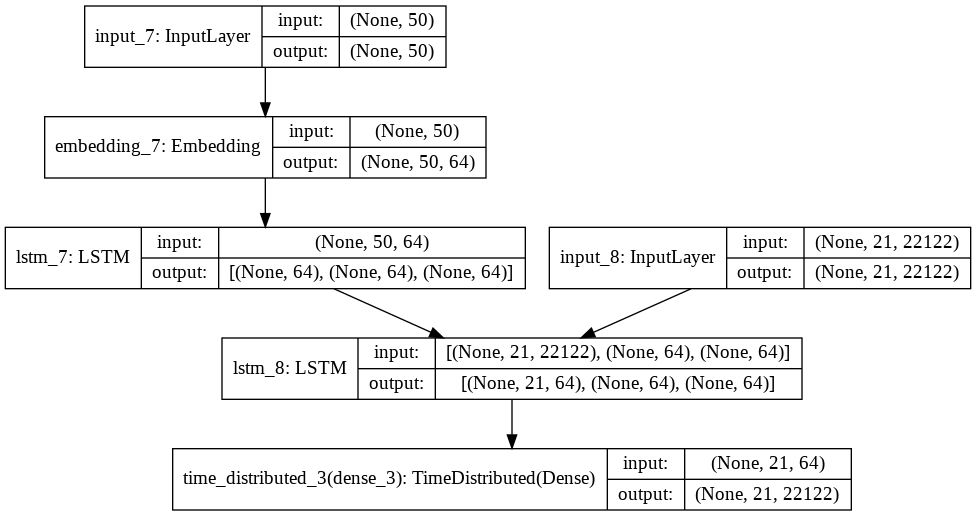

In [0]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [0]:
class DataGenerator2(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dimX=70,dimY=20, n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dimX = dimX
        self.dimY = dimY
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]
        label_temp = [self.labels[k] for k in indexes]
        # Generate data
        X,y = self.__data_generation(list_IDs_temp,label_temp)
        return X,y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, X,y):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        # X = np.empty((self.batch_size, self.dimX))
        # y = np.empty((self.batch_size, self.dimY))

        # Generate data
        # for i, ID in enumerate(list_IDs_temp):
        #     # Store sample
        #     X[i,] = list_IDs_temp
        
        y = list(map(lambda mem :np.append(mem,[len(dict_t)-1]),y))
        # y_shift = list(map(lambda mem :np.append([len(dict_t)-2], mem[:-1]),y))
        # print(y_shift.shape)
        # print(X)
        X = pad_sequences(X,maxlen=maxlen,padding='post')
        y = pad_sequences(y,maxlen=maxlen_output,padding='post') 
        # y_shift = pad_sequences(y_shift,maxlen=maxlen_output,padding='post')
        # X = np.array(keras.utils.to_categorical(X, num_classes=self.n_classes), dtype=object)
        # print(np.array(y).shape)
        y = np.array(keras.utils.to_categorical(y, num_classes=self.n_classes))
        # y_shift = np.array(keras.utils.to_categorical(y_shift, num_classes=self.n_classes))
        # Y_v = pad_sequences(y_val,maxlen=maxlen_output) 
        #     Store class
        #     y[i] = self.labels[ID]
        return X,y

In [0]:
params = {'dimX': maxlen,
          'dimY': maxlen_output,
          'batch_size': 1,
          'n_classes': vocab_size,
          'n_channels': 1,
          'shuffle': True}

# Datasets
# partition = # IDs
# labels = # Labels

# Generators
train_for_test_generator = DataGenerator2(X_train[:10], y_train[:10], **params)
# training_generator = DataGenerator(X_train, y_train, **params)
# validation_generator = DataGenerator(X_val, y_val, **params)

In [0]:
m
pred = model.predict_generator(train_for_test_generator)

In [0]:
pred

**bold text**# อย่่ามาดูอันนี้

In [0]:
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(64,))
decoder_state_input_c = Input(shape=(64,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

In [0]:
X_t = pad_sequences(X_train,maxlen=maxlen,padding='post')

In [0]:
model.predict(np.array(X_t[0]))

ValueError: ignored

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, maxlen_output))
    print(target_seq.shape)
    # Populate the first character of target sequence with the start character.
    target_seq[0] = dict_t['<s>']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = rev_dict_t[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '</s>' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [0]:
X_t[0]

array([2894, 5910,  429, 1416, 1134,   54,    9,    4,  162,   91,   18,
        232,   27,  100,   16,  396,  339,   35,  655,  857,   48,   59,
         42,    6,    2,  478,  290,  233,   22,   17,  232,  141,  544,
        647,  221,  761,  655, 2895,  857,   48,   59,    4,  328,  465,
          3, 1029,  232,  647,  221,  761], dtype=int32)

In [0]:
decode_sequence(X_t[:64])

(1, 21)


ValueError: ignored

## MODEL STH

In [0]:
!pip install --upgrade Keras

Requirement already up-to-date: Keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [0]:
%matplotlib inline

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply,Add
from tensorflow.keras.layers import RepeatVector, Dense, Activation, Lambda, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model, Model
import tensorflow.keras.backend as K
import numpy as np
%matplotlib inline
import random


2.2.0-rc3


In [0]:
# maxlen = 100
print("Max input length:", maxlen)
m=15000
Tx=maxlen
Ty=maxlen_output

Max input length: 50


In [0]:
from tensorflow.keras.activations import softmax
def softMaxAxis1(x):
    return softmax(x,axis=1)


In [0]:
#These are global variables (shared layers)
repeator = RepeatVector(Tx)
concatenator = Concatenate(axis=-1)
#Attention function###
fattn_1 = Dense(10, activation = "tanh")
fattn_2 = Dense(1, activation = "relu")
###
activator = Activation(softMaxAxis1, name='attention_scores') 
dotor = Dot(axes = 1) 
# เพื่อทำให้เป็น context vector

In [0]:
def one_step_attention(a, s_prev):

    # Repeat the decoder hidden state to concat with encoder hidden states
    s_prev = repeator(s_prev)
    concat = concatenator([a,s_prev])
    # attention function
    e = fattn_1(concat)
    energies =fattn_2(e)
    # calculate attention_scores (softmax)
    attention_scores = activator(energies)
    #calculate a context vector
    context = dotor([attention_scores,a])

    return context

In [0]:
n_h = 32 #hidden dimensions for encoder 
n_s = 64 #hidden dimensions for decoder
# output_vocab_size = len(output_chars)+1 #number of vocab is the same number of the vocab number 
output_vocab_size = 20000
encoder_LSTM =  Bidirectional(LSTM(n_h, return_sequences=True),input_shape=(-1, Tx, n_h*2))
decoder_LSTM_cell = LSTM(n_s, return_state = True) #decoder_LSTM_cell
output_layer = Dense(output_vocab_size, activation="softmax") #softmax output layer

In [0]:
def model(Tx, Ty, n_h, n_s, vocab_size, machine_vocab_size):
    """
    Arguments:
    Tx -- length of the input sequence
    Ty -- length of the output sequence
    n_h -- hidden state size of the Bi-LSTM
    n_s -- hidden state size of the post-attention LSTM
    vocab_size -- size of the input vocab
    output_vocab_size -- size of the output vocab

    Returns:
    model -- Keras model instance
    """
    
    # Define the input of your model
    X = Input(shape=(Tx, vocab_size))
    # Define hidden state and cell state for decoder_LSTM_Cell
    s0 = Input(shape=(n_s,), name='s0')
    c0 = Input(shape=(n_s,), name='c0')
    s = s0
    c = c0
    
    # Initialize empty list of outputs
    outputs = list()

    #Encoder Bi-LSTM
    # h = Bidirectional(LSTM(n_h, return_sequences=True),input_shape=(-1, Tx, n_h*2))(X)
    h = encoder_LSTM(X)
    #Iterate for Ty steps (Decoding)
    for t in range(Ty):
    
        #Perform one step of the attention mechanism to calculate the context vector at timestep t
        context = one_step_attention(h, s)
       
        # Feed the context vector to the decoder LSTM cell
        s, _, c = decoder_LSTM_cell(context,initial_state=[s,c])
           
        # Pass the decoder hidden output to the output layer (softmax)
        out = output_layer(s)
        
        # Append an output list with the current output
        outputs.append(out)
    
    #Create model instance
    model = Model(inputs=[X,s0,c0],outputs=outputs)
    
    return model

In [0]:
model = model(Tx, Ty, n_h, n_s, output_vocab_size, output_vocab_size)

In [0]:
# from keras.utils import plot_model
# plot_model(model, to_file='model.png',show_shapes=True)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 50, 20000)    0                                            
__________________________________________________________________________________________________
s0 (InputLayer)                 (None, 64)           0                                            
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 50, 64)       5128448     input_9[0][0]                    
__________________________________________________________________________________________________
repeat_vector_2 (RepeatVector)  (None, 50, 64)       0           s0[0][0]                         
                                                                 lstm_94[0][0]              

In [0]:
model.fit_generator(generator=training_generator)

RuntimeError: ignored